# <center>Digital Image Processing - Problem Set 3</center>

### Student Names:

### Instructions

This Problem Set covers the topics of frequency domain filtering and color image processing.<br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

In [2]:
# Import all the libraries needed
from os import listdir, path
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Get all the filenames in the folder images
#filenames = listdir('images')

### Problem 1

Visualize the Fourier spectrum of an image. Write a function that visualizes the spectrum of an input gray-scale image. The function should perform the following steps:

1. Compute the FFT of the input image using the FFT function <tt>numpy.fft.fft2</tt>.
2. Shift the transform to center the origin in the middle of the image using <tt>numpy.fft.fftshift</tt>.
3. The Fourier transform contains complex numbers, so we usually analyze its phase and spectrum components. Write commands that compute the Fourier spectrum from the shifted Fourier transform.
4. The resulting spectrum is difficult to visualize if plotted directly. Instead, we usually apply a logarithmic intensity transform to the spectrum before visualizing. Use the <tt>numpy.log</tt> function to accomplish this.
5. Plot the modified spectrum.

Test your function by applying it to the images <tt>face.png</tt>, <tt>blown_ic.png</tt>, <tt>test_pattern_blurring_orig.png</tt>, <tt>translated_rectangle.png</tt> and <tt>rectangle.png</tt>.

Please comment your results.

### Problem 2

Frequency domain filtering. Write a PYTHON function that performs high-frequency emphasis (hfe) filtering. Recall that an hfe filter is defined as:
\begin{equation}
H_{hfe}(u,v) = a + b \cdot H_{hp}(u,v)
\end{equation}
where $a$ is the offset, $b$ is the high-frequency amplification and $H_{hp}$ is the transfer function of a high-pass filter. Your function should be based on a second-order high-pass Butterworth filter with a cut-off frequency $D_0$, which is given by:
\begin{equation}
H_{hp}(u,v) = \frac{1}{1 + \left[\frac{D_0}{D(u,v)}\right]^{2n}}.
\end{equation}
<b>Note. </b> $D(u,v)$ measures the Euclidean distance from the point $(u,v)$ to the center of the frequency plane.

Use your function and filters on the image <tt>chest.jpg</tt> to reproduce the image enhancement illustrated below.

<img src="files/images/chest.jpg"/ width=200> <img src="files/images/out.png"/width=200>

The outline of the process is the following:

1. Create a high-pass Butterworth filter with a frequency domain dimension of 2 times the size of the input image. Plot the filter image.
2. Compute the FFT of the input image using the function <tt>numpy.fft.fft2</tt>. The FFT should have frequency domain dimensions equal to the dimensions of the filter, which should be set using the input parameters of the <tt>fft2</tt> function. Plot the FFT image.
3. Filter the image using the high-pass Butterworth filter. To filter an image in the frequency domain, you should multiply the fourier transform of the image and the frequency response of the filter. To go back to the spatial domain, you need to apply the inverse FFT and take the real component of the resut. Plot the resulting image.
4. Create a high-frequency emphasis filter based on the Butterworth filter of step 1. Plot the filter image.
5. Filter the image using a high-frequency emphasis filter. Plot the resulting image.
6. After filtering, you may need to stretch the intensity values of each resulting image to the range [0, 255]. You can achieve this by substracting the minimum intensity value, dividing by the maximum and multiplying the result by 255.
7. Apply histogram equalization to the image obtained in the previous step. You should obtain a similar result to that shown above.

Use the following parameters for the filters: $a = 0.5$, $b = 2$, $n=2$ and $D_0$ should be set to $5\%$ of the vertical dimension of the filter.

Please comment your results.

### Problem 3

Color spaces. Write a function that converts an image from the RGB color
space to HSI color space. Write another function that converts an image from the HSI
color space to RGB color space. You should use the homework equations to implement these conversions.

When plotting images in the HSI space, you should plot each channel separately, using one image for the H channel, another for the S channel and another for the I channel.

Test your function converting images from RGB to HSI and back to RGB.

c:\python27\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
c:\python27\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in double_scalars


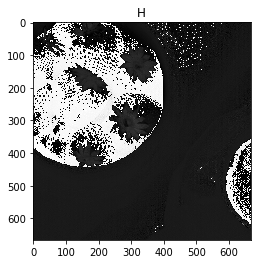

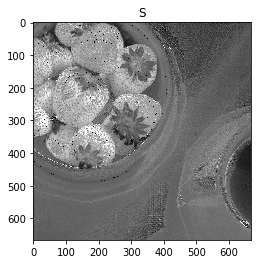

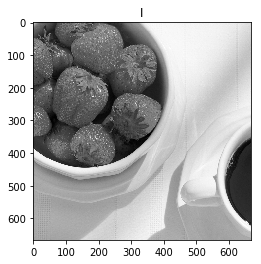

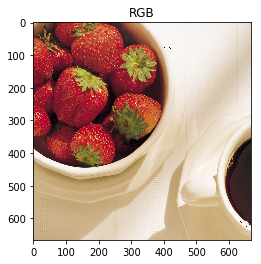

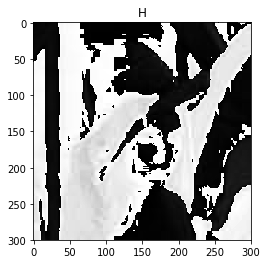

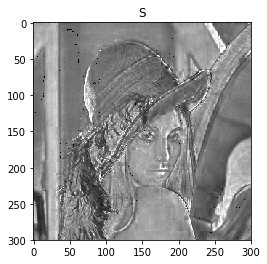

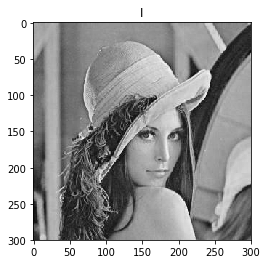

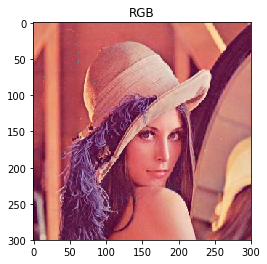

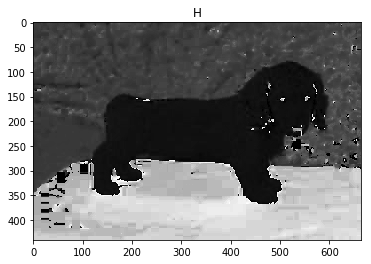

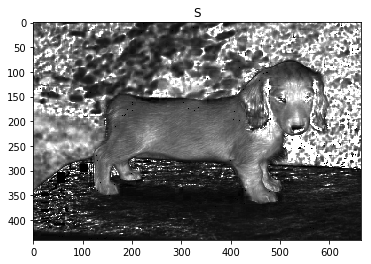

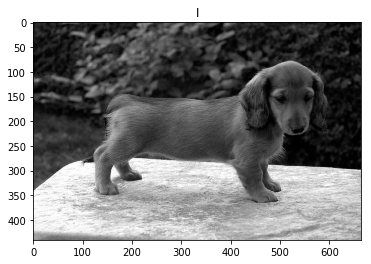

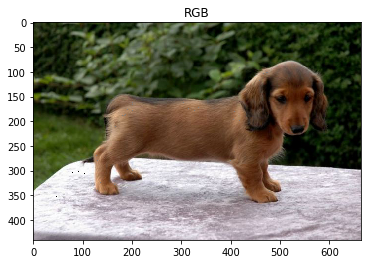

In [4]:
def rgb2hsi(image):
    """ Function that converts an image from RGB to HSI.
    Input:  image: numpy array with the image data (RGB).
    ====== 
    
    Output: numpy array with the converted image.
    ======
    """
    height, width = image.shape[0], image.shape[1]
    h=np.zeros((height,width), np.float)
    s=np.zeros((height,width), np.float)
    i=np.zeros((height,width), np.float)
    for row in range(height):
        for col in range(width):
            b=image[row,col,0]/255.0; g=image[row,col,1]/255.0; r=image[row,col,2]/255.0
            cmax = max(r,g,b); cmin = min(r,g,b)
            delta = cmax-cmin
            i[row][col] = (cmax+cmin)/2
            if delta==0:
                h[row][col] = 0
                s[row][col] = 0
            elif cmax==r:
                h[row][col] = 60*(g-b)/delta
            elif cmax==g:
                h[row][col] = 120 + 60*(b-r)/delta
            elif cmax==b:
                h[row][col] = 240 + 60*(r-g)/delta
            if h[row][col]<0:
                h[row][col]=h[row][col]+360
            if i[row][col]<0.5:
                s[row][col] = delta/(cmax+cmin)
            elif i[row][col]>0.5:
                s[row][col] = delta/(2-(cmax+cmin))
    return cv2.merge((h,s,i))

def hsi2rgb(image):
    """ Function that converts an image from HSI to RGB.
    Input:  image: numpy array with the image data (HSI).
    ====== 
    
    Output: numpy array with the converted image.
    ======
    """
    height, width = image.shape[0], image.shape[1]
    r=np.zeros((height,width), np.float)
    g=np.zeros((height,width), np.float)
    b=np.zeros((height,width), np.float)
    for row in range(height):
        for col in range(width):
            h=image[row,col,0]; s=image[row,col,1]; i=image[row,col,2]
            c=(1- np.abs(2*i-1))*s
            x=c*(1 - np.abs((h/60.0)%2.0 - 1))
            m=i-c/2.0
            if (0<=h and h<60):
                r[row][col] = c+m
                g[row][col] = x+m
                b[row][col] = 0+m
            elif (60<=h and h<120):
                r[row][col] = x+m
                g[row][col] = c+m
                b[row][col] = 0+m
            elif (120<=h and h<180):
                r[row][col] = 0+m
                g[row][col] = c+m
                b[row][col] = x+m
            elif (180<=h and h<240):
                r[row][col] = 0+m
                g[row][col] = x+m
                b[row][col] = c+m
            elif (240<=h and h<300):
                r[row][col] = x+m
                g[row][col] = 0+m
                b[row][col] = c+m
            elif (300<=h and h<360):
                r[row][col] = c+m
                g[row][col] = 0+m
                b[row][col] = x+m
    return cv2.merge((r,g,b))

names = ["fruits.jpg","lena.jpg","dog.jpg"]
for name in names:
    img =  cv2.imread("images/"+name)
    out_hsi = rgb2hsi(img)
    h,s,i = cv2.split(out_hsi)
    out_rgb = hsi2rgb(out_hsi)
    plt.figure(); plt.imshow(h,'gray'); plt.title("H");
    plt.figure(); plt.imshow(s,'gray'); plt.title("S");
    plt.figure(); plt.imshow(i,'gray'); plt.title("I");
    plt.figure(); plt.imshow(out_rgb); plt.title("RGB");

In [ ]:
# HSI to RGB http://www.rapidtables.com/convert/color/hsl-to-rgb.htm
# RGB to HSI http://www.rapidtables.com/convert/color/rgb-to-hsl.htm
# http://docs.opencv.org/3.1.0/de/d25/imgproc_color_conversions.html

### Problem 4

Manipulating color images. Write a function that converts a color image from the RGB to
the HSI color space, modifies the ‘I’ channel by applying histogram equalization, and revert
back the image to the RGB color space. Apply this function to enhance the image <tt>dark_fountain.jpg</tt>.

c:\python27\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


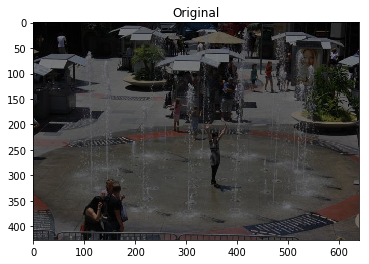

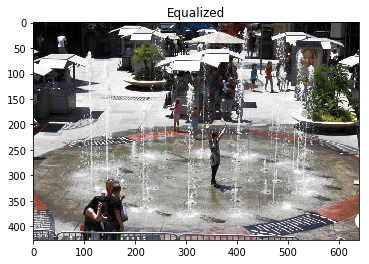

In [101]:
def equ_hist(image):
    """ Function that equalize an image.
    Input:  image: numpy array with the image data (RGB).
    ====== 
    
    Output: numpy array with the equalized image.
    ======
    """
    hsi = rgb2hsi(image.copy())
    equ = cv2.equalizeHist(np.array(255*hsi[:,:,2],dtype = np.uint8))
    hsi[:,:,2] = np.array(equ, np.float64)/255
    return hsi2rgb(hsi)

img = cv2.imread("images/dark_fountain.jpg");
equ_img = equ_hist(img)

plt.figure(); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original");
plt.figure(); plt.imshow(equ_img); plt.title("Equalized");

### Problem 5 

Manipulating color images. Consider the RGB color image <tt>squares.jpg</tt>, where the
squares are pure red, green and blue.

<img src="files/images/squares.jpg" width=200 />

1. Convert this image to the HSI color space. Blur the H component of the image using a 25x25 averaging mask, and convert it back to RGB. How do you explain the obtained result?
2. Repeat, blurring only the saturation component this time. How do you explain the result?


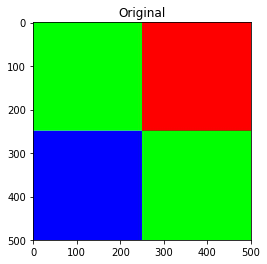

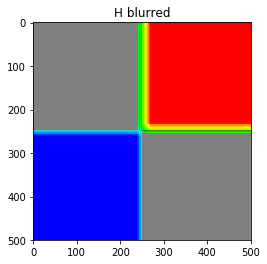

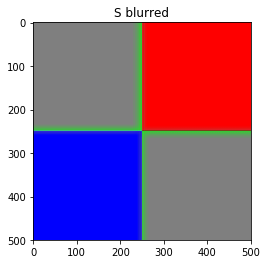

In [75]:
name = "squares.jpg"
img =  cv2.imread("images/"+name)
out_hsi = rgb2hsi(img)
out1 = out_hsi.copy()
out1[:,:,0] = cv2.blur(out1[:,:,0],(25,25))
out2 = out_hsi.copy()
out2[:,:,1] = cv2.blur(out2[:,:,1],(25,25))

plt.figure(); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original");
plt.figure(); plt.imshow(hsi2rgb(out1)); plt.title("H blurred");
plt.figure(); plt.imshow(hsi2rgb(out2)); plt.title("S blurred");

## Problem 6

False color. Write a Python function that produces a false color visualization of
the input gray-scale image as follows:

1. If the intensity of an input pixel is lower than a threshold $T$, then the color of the corresponding pixel should be blue.
2. If the intensity of an input pixel is larger or equal than a threshold $T$, then the color of the corresponding pixel should be yellow.

Use your function to reproduce the following result on the image <tt>weld_x-ray.jpg</tt>:

<img src="files/images/weld_x-ray.jpg" width=200 /> <img src="files/images/Fig6.21(b).jpg" width=200 /> 

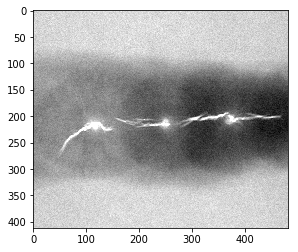

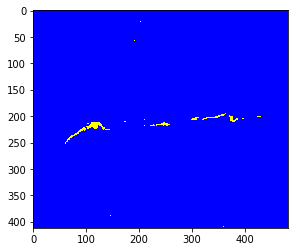

In [73]:
def false_color(image,T):
    """ Function that produces a false color visualization of a gray-scale image.
    Input:  image: numpy array with the image data (gray-scale).
    ====== 
    
    Output: numpy array with the false color image.
    ======
    """
    height, width = image.shape[0], image.shape[1]
    out=np.zeros((height,width,3), np.uint8)
    blues = np.where(image<T,255,0)
    yellows = 255 - blues
    out[:,:,0]=blues; out[:,:,1]=yellows; out[:,:,2]=yellows;
    return out

img = cv2.imread("images/weld_x-ray.jpg", cv2.IMREAD_GRAYSCALE)
out = false_color(img,250)
plt.figure();plt.imshow(img, cmap='gray')
plt.figure();plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

## Problem 7

Green screen effects. Write a function that replaces the green background of the image <tt>hiro.jpg</tt> with a background image of your choice.

<img src="files/images/hiro.jpg" width=300>

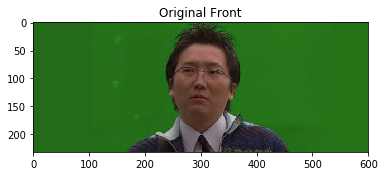

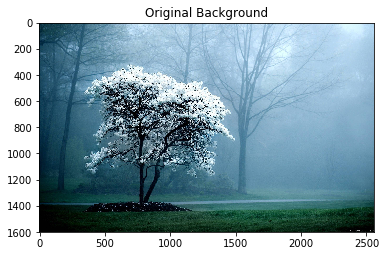

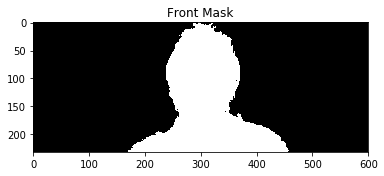

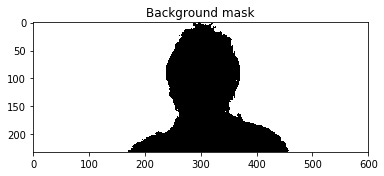

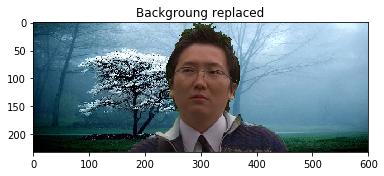

In [95]:
def chroma_key(image,image2):
    """ Function that replaces the green background of an image.
    Input:  image: numpy array with the front image.
    ====== image2: numpy array with the background image.
    
    Output: numpy array with the replaced image.
    ======
    """
    hls = image.copy(); bkgnd = image2.copy(); front = image.copy()
    height, width = front.shape[:2]
    bkgnd = cv2.resize(bkgnd,(width, height), interpolation = cv2.INTER_CUBIC)
    hls =cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    H = hls[:,:,0]; L = hls[:,:,1]; S = hls[:,:,2]
    greens = np.where((50<H)&(H<67)&(30<L)&(L<90),1,0)
    not_green = 1-greens
    bkgnd[:,:,0] = bkgnd[:,:,0]*greens; bkgnd[:,:,1] =bkgnd[:,:,1]*greens; bkgnd[:,:,2] = bkgnd[:,:,2]*greens
    front[:,:,0] = front[:,:,0]*not_green; front[:,:,1] =front[:,:,1]*not_green; front[:,:,2] = front[:,:,2]*not_green
    return bkgnd + front


img =  cv2.imread("images/hiro.jpg")
img2 =  cv2.imread("images/background.jpg")
out = chroma_key(img,img2)
plt.figure(); plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title("Original Front");
plt.figure(); plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)); plt.title("Original Background");
plt.figure(); plt.imshow(not_green*255,'gray'); plt.title("Front Mask");
plt.figure(); plt.imshow(greens*255, 'gray'); plt.title("Background mask");
plt.figure(); plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)); plt.title("Backgroung replaced");

The background of an image is replaced with another picture previously resized to the size of the first one.

Since the background image could have a different size, it is necessary to crop it or resize. The function resize of opencv was used to resize the background image to the size of the image with the green background.

To catch the background, the color scale of the image was transformed to the HSI scale in order to get the green pixels. However the background is not pure green like H=120°(=60° for the convention of the hsl function converter) [http://docs.opencv.org/3.1.0/de/d25/imgproc_color_conversions.html] for the  therefore it was include the I parameter to get the green of the image. Trying to generalize the function for a wide spectrum of greens the conditional is a range: 55 <H<60 and 66<L<70. It was used the function where() of numpy which gets the condition and evaluates for each element of the matrix. The background mask is 1 for the pixels out of the condition and 0 for the ones inside. The front mask is the negative image of the backgroung mask. The replaced image is the background image multiply by the background mask in order to make 0 the pixels corresponding to the front or not green pixels plus the front image multiply by the front mask in order to make 0 the green pixels.